<a href="https://colab.research.google.com/github/Satvik256/TestRepo/blob/master/Bear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [0]:
path=Path(base_dir+'data/bears')

In [0]:
path.mkdir(exist_ok=True,parents=True)

In [0]:
folders=['black','grizzly','teddy']

In [0]:
for f in folders:
  dest=path/f
  dest.mkdir(parents=True,exist_ok=True)

In [7]:
for f in folders:
  file=f+'.txt'
  dest=path/f
  download_images(path/f/file, dest, max_pics=200)

FileNotFoundError: ignored

In [15]:
for c in folders:
  print(c)
  verify_images(path/c,delete=True,max_workers=8)

black


grizzly


teddy


In [0]:
np.random.seed(42)
d=ImageDataBunch.from_folder(path,train='.',valid_pct=0.2,ds_tfms=get_transforms(),size=224,num_workers=4).normalize(imagenet_stats)

In [17]:
d.classes

['black', 'grizzly', 'teddy']

In [18]:
d.c

3

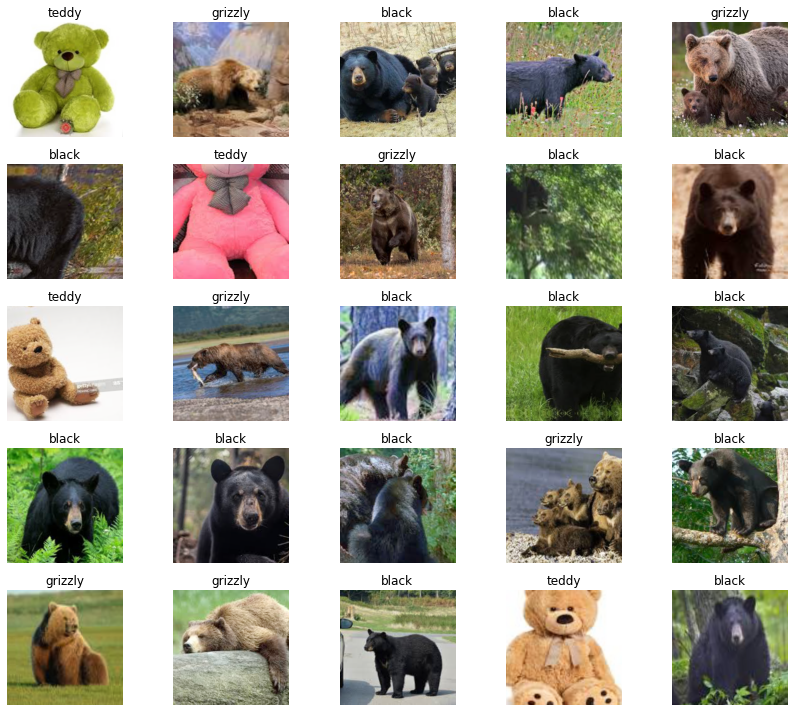

In [19]:
d.show_batch(rows=5,figsize=(12,10))

In [20]:
len(d.train_ds),len(d.valid_ds)

(396, 99)

In [0]:
model=cnn_learner(d,models.resnet34,metrics=error_rate)

In [22]:
model.fit_one_cycle(4)

In [0]:
model.save('stage-1')

In [0]:
model.unfreeze()

In [24]:
model.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


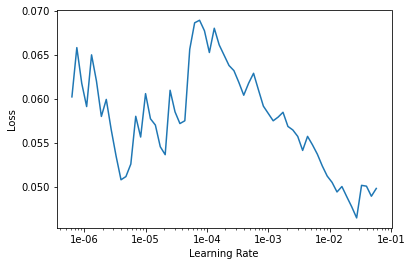

In [25]:
model.recorder.plot()

In [27]:
 model.fit_one_cycle(4,max_lr=slice(1e-3,1e-2))

In [28]:
model.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (396 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
teddy,teddy,teddy,teddy,teddy
Path: /content/gdrive/My Drive/fastai-v3/data/bears;

Valid: LabelList (99 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
grizzly,teddy,black,black,black
Path: /content/gdrive/My Drive/fastai-v3/data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (b

In [31]:
i=ClassificationInterpretation.from_learner(model)

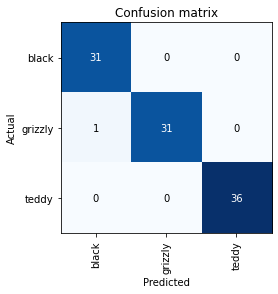

In [32]:
i.plot_confusion_matrix()

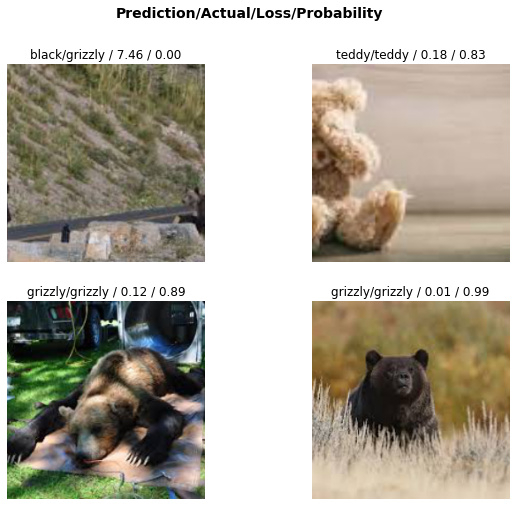

In [34]:
i.plot_top_losses(4,figsize=(10,8))

In [72]:
model.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (396 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
teddy,teddy,teddy,teddy,teddy
Path: /content/gdrive/My Drive/fastai-v3/data/bears;

Valid: LabelList (99 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
grizzly,teddy,black,black,black
Path: /content/gdrive/My Drive/fastai-v3/data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (b

In [73]:
path

PosixPath('/content/gdrive/My Drive/fastai-v3/data/bears')

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

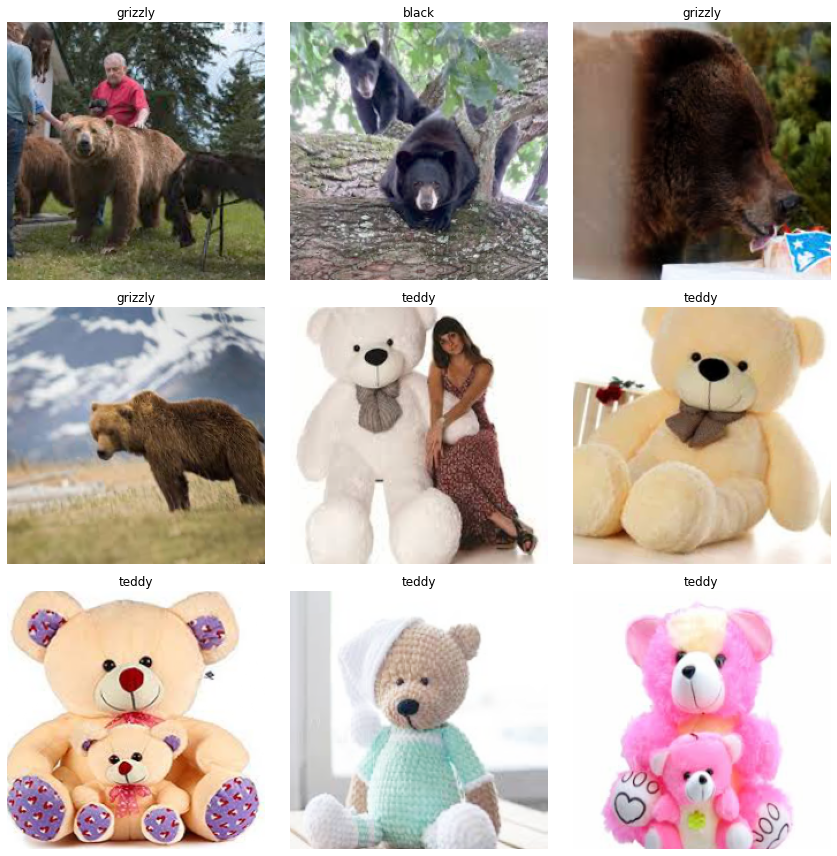

In [75]:
db.show_batch(3)

In [0]:
model_2=cnn_learner(db,models.resnet34,metrics=error_rate)

In [0]:
model_2=model.load('stage-1')

In [79]:
ds,idxs=DatasetFormatter().from_toplosses(model_2)

In [80]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [0]:
 db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
                    .split_none()
                    .label_from_df()
                    .transform(get_transforms(), size=224)
                    .databunch()
      )

In [0]:
model_2=cnn_learner(db,models.resnet34,metrics=error_rate)

In [84]:
ds2,idx2=DatasetFormatter().from_similars(model_2)

Getting activations...


Computing similarities...


In [86]:
ImageCleaner(ds2,idx2,path,duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [0]:
 db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
                    .split_none()
                    .label_from_df()
                    .transform(get_transforms(), size=224)
                    .databunch()
      )

In [89]:
path

PosixPath('/content/gdrive/My Drive/fastai-v3/data/bears')

In [0]:
np.random.seed(42)
data=ImageDataBunch.from_csv(path,valid_pct=0.2,ds_tfms=get_transforms(),size=224,num_workers=4,csv_labels='cleaned.csv').normalize(imagenet_stats)

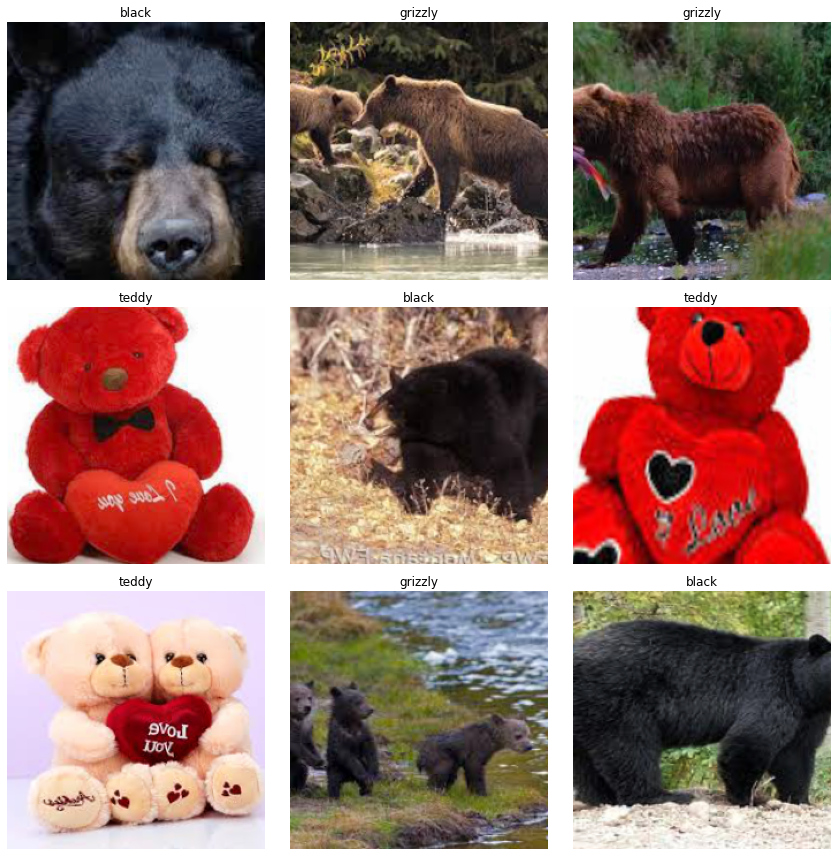

In [94]:
data.show_batch(3)

In [0]:
learn=cnn_learner(data,models.resnet34,metrics=error_rate)

In [98]:
learn.fit_one_cycle(4)

In [0]:
learn.save('stage-3')

**Putting The Model Up For Production**

In [0]:
img=open_image(path/'black'/'black (103).jpg')

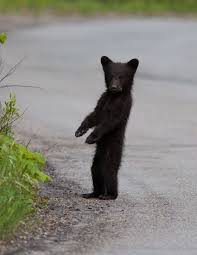

In [109]:
img

In [110]:
learn.load('stage-3')

Learner(data=ImageDataBunch;

Train: LabelList (308 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
teddy,teddy,teddy,teddy,teddy
Path: /content/gdrive/My Drive/fastai-v3/data/bears;

Valid: LabelList (76 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
grizzly,black,grizzly,grizzly,teddy
Path: /content/gdrive/My Drive/fastai-v3/data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      

In [0]:
learn.export()

In [115]:
doc(learn.export)

In [0]:
learn=load_learner(path)

In [117]:
doc(load_learner)

In [0]:
pred_class,pred_idx,output=learn.predict(img)

In [123]:
print(pred_class)

black


In [121]:
output

tensor([9.9989e-01, 1.1343e-04, 1.1495e-06])

black


tensor([0.9815, 0.0139, 0.0046])

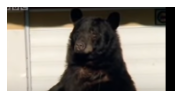

In [137]:
img2=open_image(path/'test1.png')
show_image(img2)
pred_class,_,pred_proba=learn.predict(img2)
print(pred_class)
pred_proba

teddy


tensor([1.7121e-11, 6.3711e-12, 1.0000e+00])

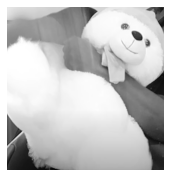

In [144]:
img2=open_image(path/'test4.png')
show_image(img2)
pred_class,_,pred_proba=learn.predict(img2)
print(pred_class)
pred_proba

teddy


tensor([3.0385e-04, 2.8253e-01, 7.1716e-01])

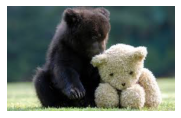

In [145]:
img2=open_image(path/'test5.jpg')
show_image(img2)
pred_class,_,pred_proba=learn.predict(img2)
print(pred_class)
pred_proba